# CASE STUDY: SMILING FACES DETECTOR
# Credit goes to Dr. Ryan
https://www.udemy.com/python-3-beginner-to-pro/

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

- The dataset contains a series of images that can be used to solve the Happy House problem! 
- We need to build an artificial neural network that can detect smiling faces.
- Only smiling people will be allowed to enter the house!
- The train set has 600 examples. The test set has 150 examples.
- Data Source: https://www.kaggle.com/iarunava/happy-house-dataset


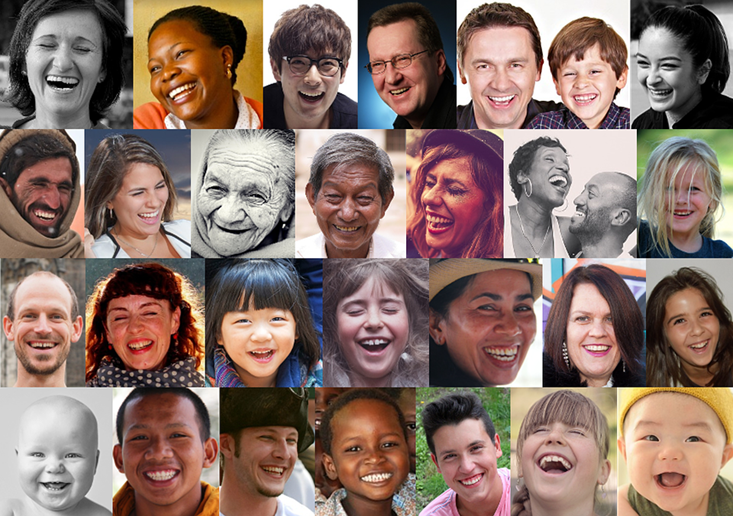

# STEP #2: IMPORTING DATA

In [49]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py # binary pictures
import random 

HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

## Import and handle h5py files

In [50]:
h5py.run_tests()

...........s...........................................x.................................s......................................x....................................sC:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\files.py:258: H5pyDeprecationWarning: File.fid has been deprecated. Use File.id instead.
  "Use File.id instead.", H5pyDeprecationWarning)
...s......ss.ss...............................................................................ss...................ssssss.....................................................................x....x.........................x......x..................................................ssss............................................................
----------------------------------------------------------------------
Ran 509 tests in 3.436s

OK (skipped=20, expected failures=6)


<unittest.runner.TextTestResult run=509 errors=0 failures=0>

In [51]:
filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file. train set x for data and train set y for target


list_classes
train_set_x
train_set_y


In [52]:
filename2 = 'test_happy.h5'
f = h5py.File(filename2, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.


list_classes
test_set_x
test_set_y


In [53]:
happy_training = h5py.File('train_happy.h5', "r")
happy_testing  = h5py.File('test_happy.h5', "r")

In [54]:
happy_lists = happy_testing["list_classes"]

In [55]:
happy_lists # shape 2 for 2 classes

<HDF5 dataset "list_classes": shape (2,), type "<i8">

## Load training and testing data 

In [56]:
X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:]) 


In [57]:
X_train

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

In [58]:
X_train.shape # 600 pictures, 64x64 pixel, rbg = 3 (gray would be 1)

(600, 64, 64, 3)

In [59]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [60]:
y_train.shape # 600 target values

(600,)

# STEP #3: VISUALIZATION OF THE DATASET  

0


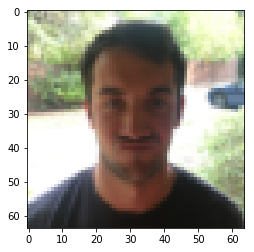

In [61]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])


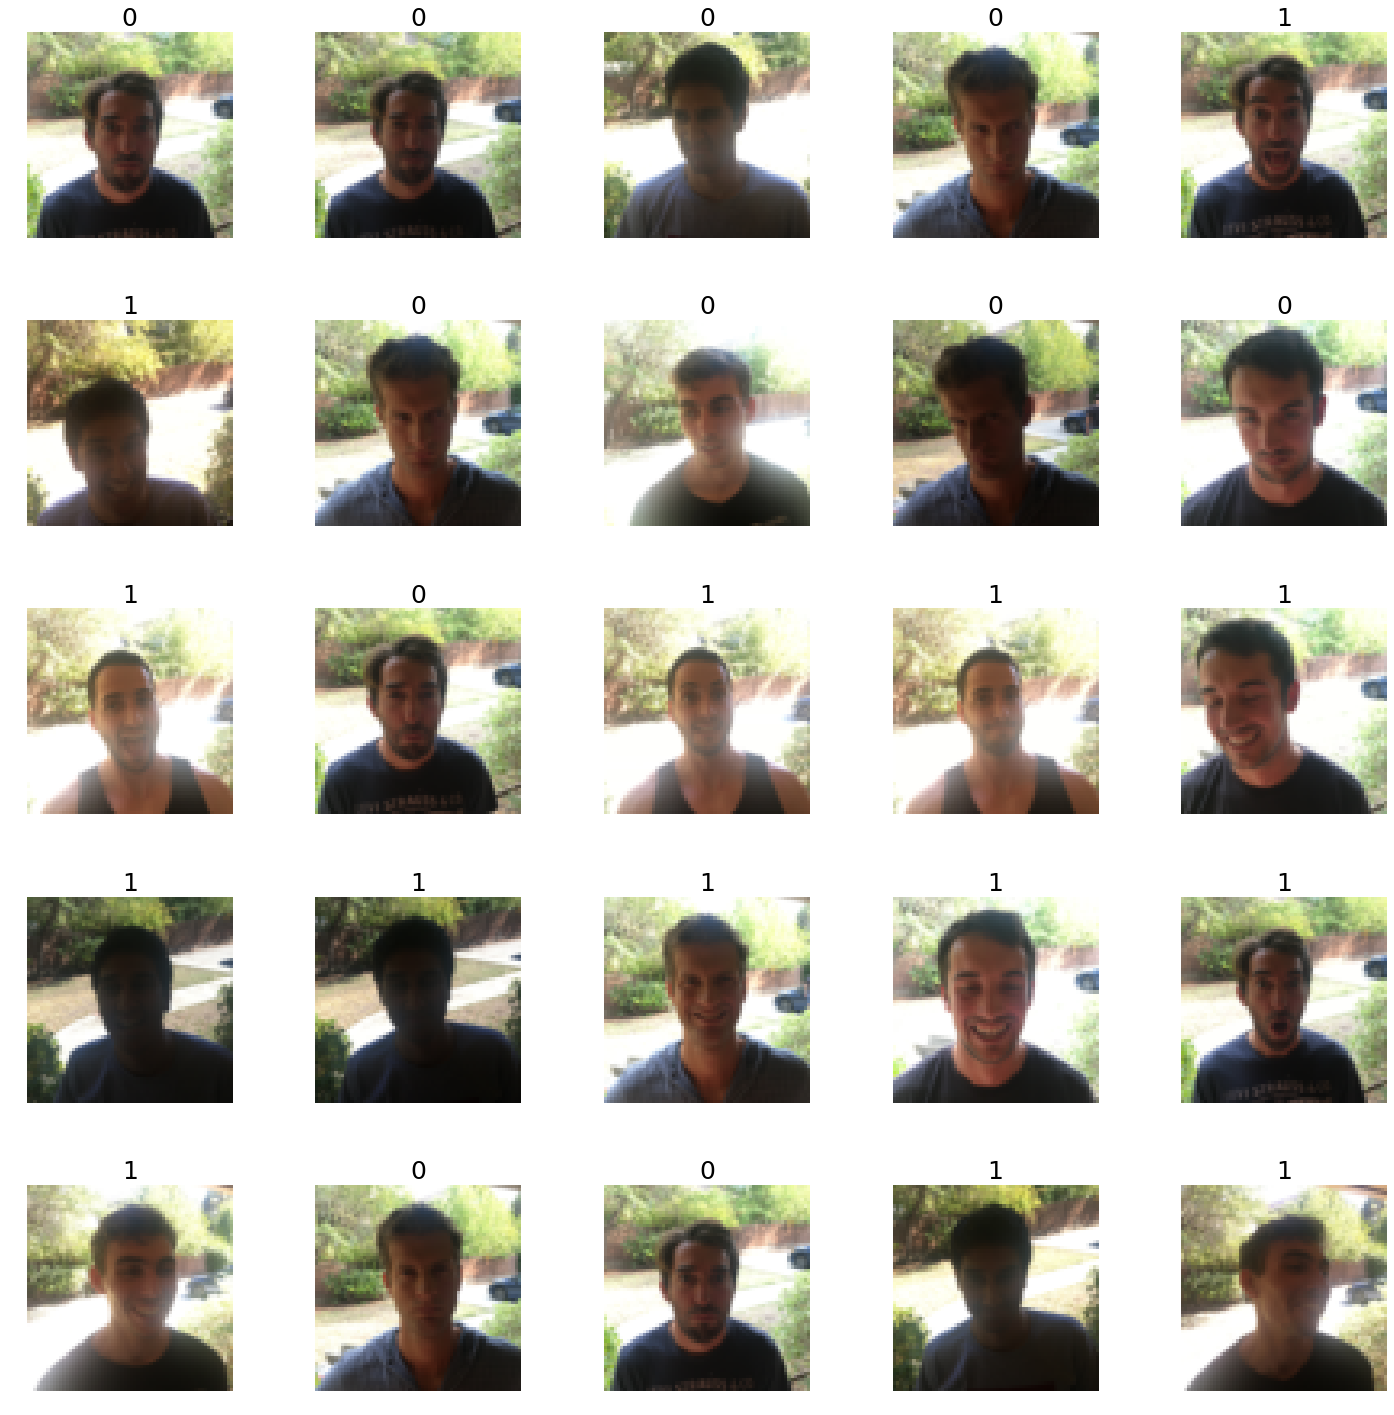

In [62]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off') # remove pixel labels

plt.subplots_adjust(hspace=0.4)

        

# STEP #4: TRAINING THE MODEL

## Normalization of the model

In [63]:
X_train

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

by dividing the values with 255, the range of each value is within 0 and 1 -> factor

In [64]:
# Let's normalize dataset
X_train = X_train/255
X_test = X_test/255


In [65]:
X_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

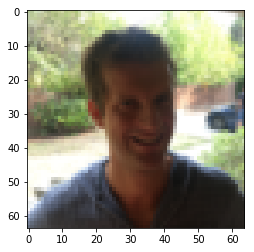

In [66]:
plt.imshow(X_train[9])

In [67]:
X_train.shape

(600, 64, 64, 3)

In [68]:
y_train.shape

(600,)

## Build the CNN model

In [69]:
# Import train_test_split from scikit library
from keras.models import Sequential #from left to right sequential (Input layer, maxpooling etc.)
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #dense = fully connected layer
from keras.optimizers import Adam # paperlink https://arxiv.org/abs/1412.6980v8
from keras.callbacks import TensorBoard # to visualize it



In [70]:
cnn_model = Sequential()

# first convolutional layer
cnn_model.add(Conv2D(64, (6, 6), input_shape = (64,64,3), activation='relu')) 
# add the different layers 64 Kernels, 6 by 6 dimensions | input shape 64x64 pixels and colored image
# activation function is the relu function ( only positive values)
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) #2 x 2 y fields
cnn_model.add(Dropout(0.2)) #20 % of the neurons are dropped out randomly

# 2nd convolutional layer but without the input
cnn_model.add(Conv2D(64, (5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))


cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu')) #output dim = 128 dimensions randomly
cnn_model.add(Dense(1, activation = 'sigmoid')) #output dim = 1 for 2 possible dimensions 0 or 1
# sigmoid function that it either smile or not ( 0 or 1 as target value)


## Train our CNN model

In [71]:
cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
#shift tab for more information on compile
# loss function binary because our output is binary and not categorial
# lr = learning rate

In [72]:
epochs = 10

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 30,
                        nb_epoch = epochs,
                        verbose = 1)

#30 images per batch



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/10
600/600 [==============================] - 15s 26ms/step - loss: 0.6871 - acc: 0.5467
Epoch 2/10
600/600 [==============================] - 15s 25ms/step - loss: 0.6312 - acc: 0.6233
Epoch 3/10
600/600 [==============================] - 15s 26ms/step - loss: 0.5411 - acc: 0.7150
Epoch 4/10
600/600 [==============================] - 15s 24ms/step - loss: 0.3500 - acc: 0.8400
Epoch 5/10
600/600 [==============================] - 15s 24ms/step - loss: 0.2460 - acc: 0.9117
Epoch 6/10
600/600 [==============================] - 15s 24ms/step - loss: 0.2223 - acc: 0.9217
Epoch 7/10
600/600 [==============================] - 15s 25ms/step - loss: 0.1916 - acc: 0.9383
Epoch 8/10
600/600 [==============================] - 15s 25ms/step - loss: 0.1462 - acc: 0.9417
Epoch 9/10
600/600 [==============================] - 15s 25ms/step - loss: 0.1478 - acc: 0.9400
Epoch 10/10
600/600 [==============================] - 15s 25ms/step - loss: 0.1167 - acc: 0.9567


# STEP #5: EVALUATING THE MODEL

## Using the model on the test data

In [73]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))
# Test Dataset are 150 images 

150/150 [==============================] - 1s 7ms/step
Test Accuracy : 0.927


In [74]:
evaluation
# [0] ?
# accuracy is in number 1

[0.1824941368897756, 0.9266666682561239]

## Get the predicted target values for each image

In [75]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


In [76]:
predicted_classes

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [77]:
predicted_classes.shape

(150, 1)

In [78]:
y_test.shape

(150,)

## Compare the target values with the actual values and visualize the images

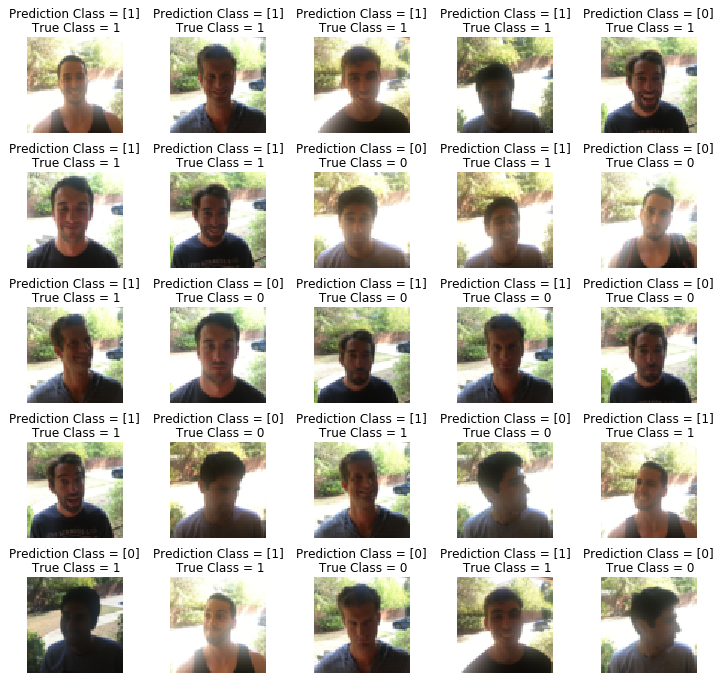

In [79]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))


## Set up confusion metrics

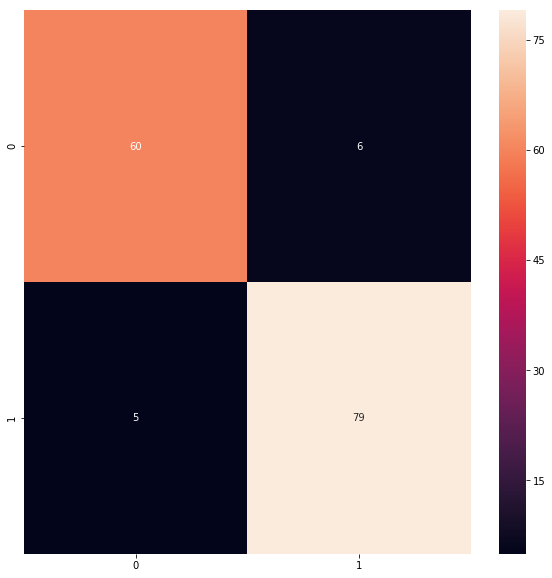

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.93      0.94      0.93        84

   micro avg       0.93      0.93      0.93       150
   macro avg       0.93      0.92      0.93       150
weighted avg       0.93      0.93      0.93       150

